In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score ,f1_score 
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
 data=pd.read_csv('diabetes.csv')

#explore data

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.duplicated().sum()

0

#analysis

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

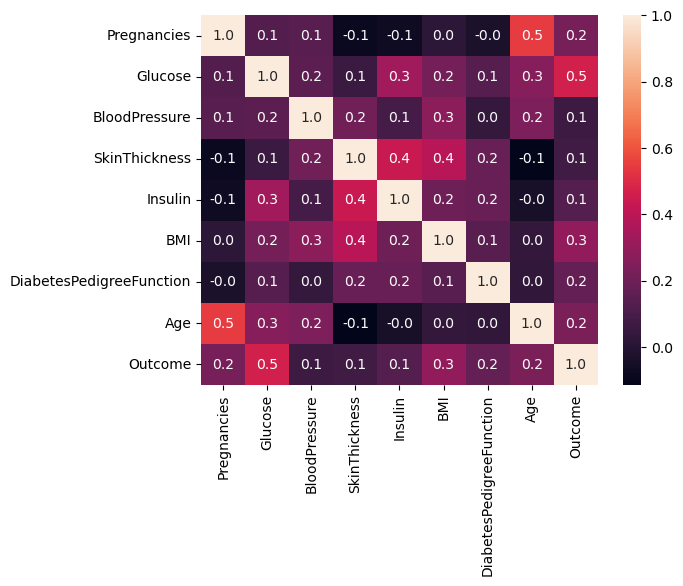

In [14]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

C:\Users\MASTER\AppData\Local\Temp\ipykernel_3908\2990758130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=data,palette=['g','r'])


<Axes: xlabel='Outcome', ylabel='count'>

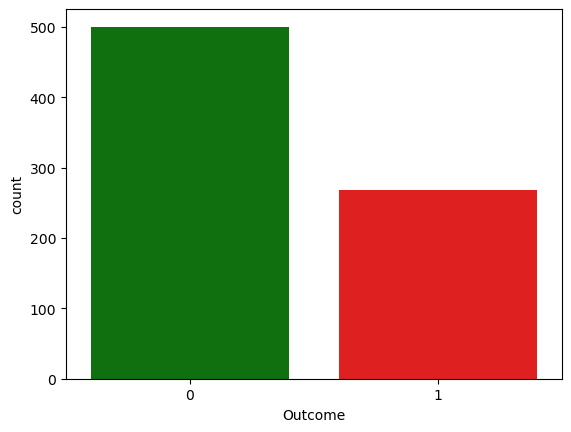

In [15]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

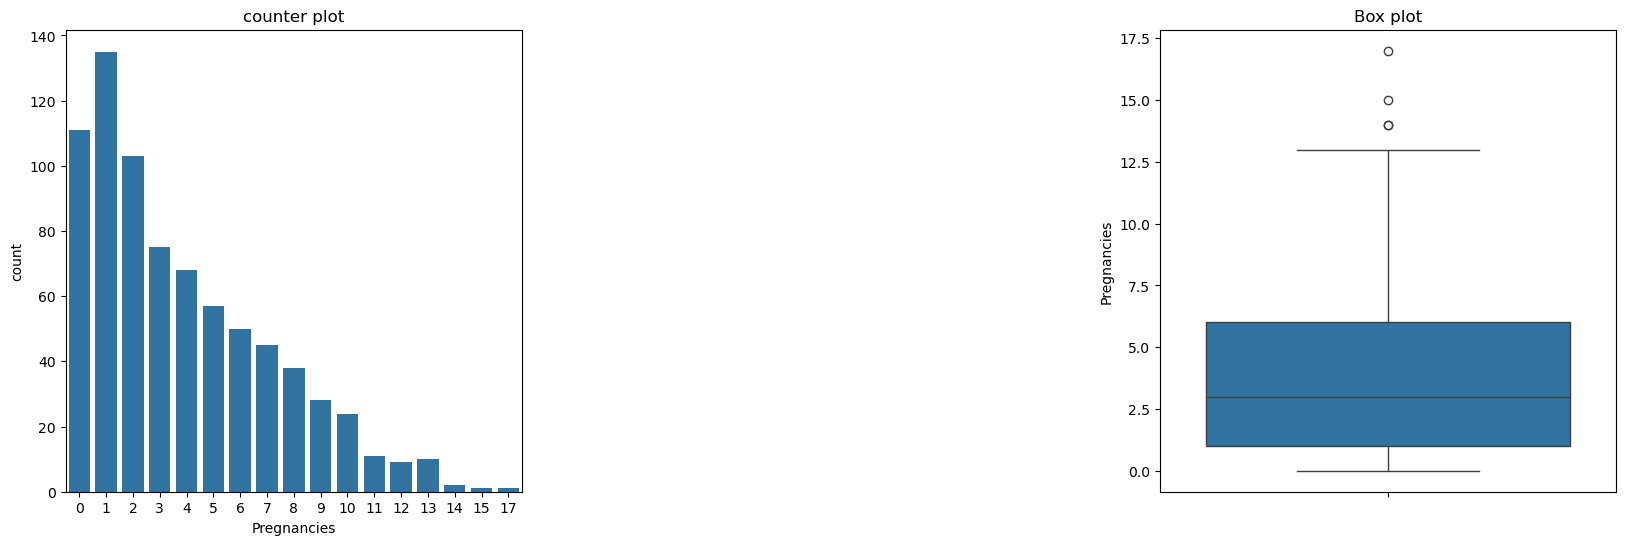

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data=data)



plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y=data["Pregnancies"])
plt.show()

<Axes: title={'center': 'Distribution plot'}, ylabel='Pregnancies'>

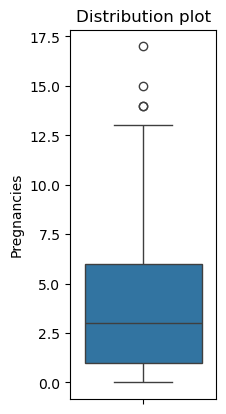

In [26]:
plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.boxplot(data["Pregnancies"])

<Axes: ylabel='Age'>

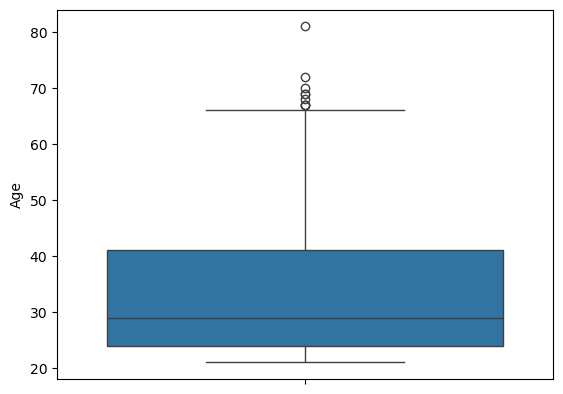

In [28]:
sns.boxplot(data.Age)

#create model

In [29]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [46]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)


In [52]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
accuracy is:   0.7727272727272727 recall is :    0.75 f1 is:   0.631578947368421


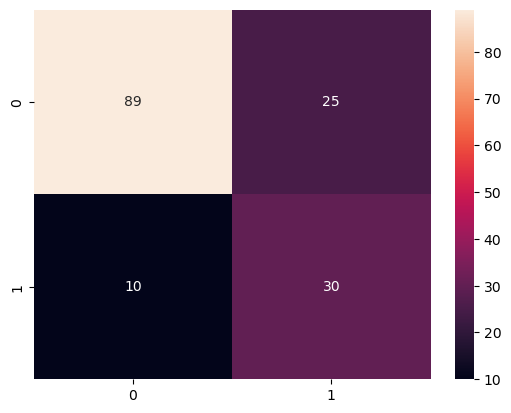

In [53]:
def cal(model):
  model.fit(x_train,y_train)
  pre=model.predict(x_test)
  accuracy=accuracy_score(pre,y_test)
  recall=recall_score(pre,y_test)
  f1=f1_score(pre,y_test)
  result1.append(accuracy) 
  result2.append(recall)
  result3.append(f1)  
  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('accuracy is:  ', accuracy, 'recall is :   ', recall , 'f1 is:  ', f1)
cal(model1)

SVC()
accuracy is:   0.7857142857142857 recall is :    0.7894736842105263 f1 is:   0.6451612903225806


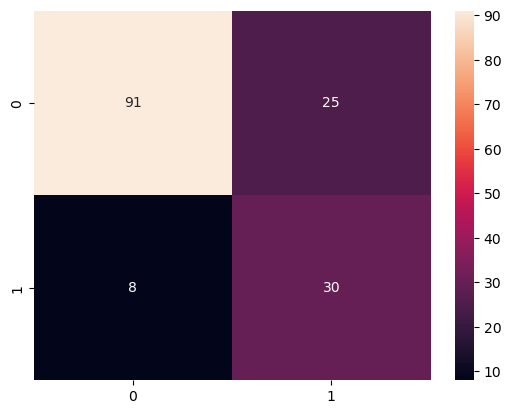

In [47]:
cal(model2)

RandomForestClassifier()
accuracy is:   0.7597402597402597 recall is :    0.6875 f1 is:   0.6407766990291263


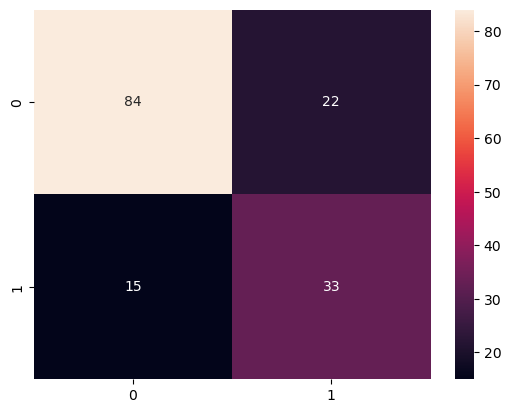

In [48]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is:   0.7402597402597403 recall is :    0.6363636363636364 f1 is:   0.6363636363636364


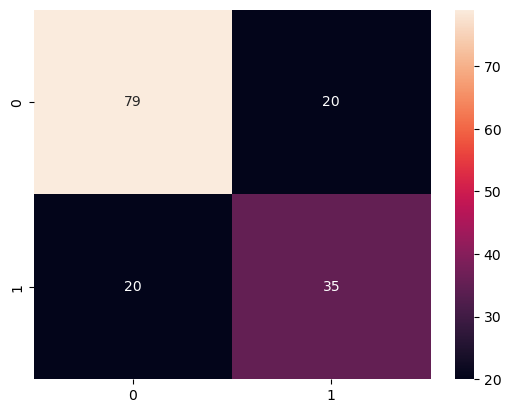

In [49]:
cal(model4)

In [54]:
result1

[0.7727272727272727]

In [55]:
result2

[0.75]

In [56]:
result3

[0.631578947368421]

In [63]:
FinalResult=pd.DataFrame({'Algorithm':columns,'Accuracies':result1,'Recall': result2,'Fscore': result3})

ValueError: All arrays must be of the same length

NameError: name 'FinalResult' is not defined

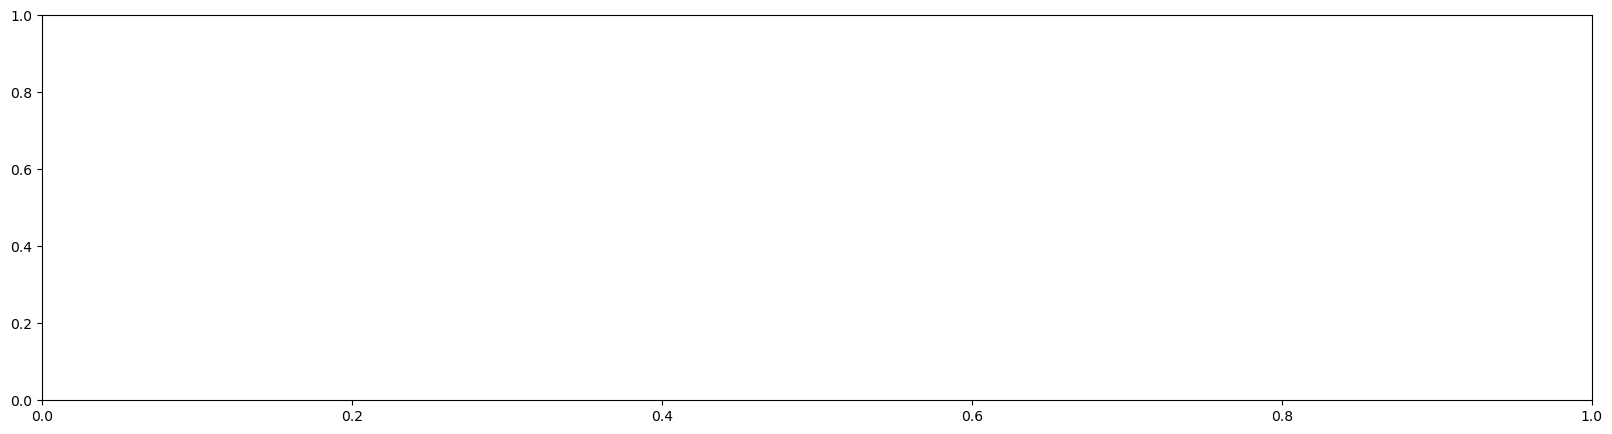

In [61]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result1, label='Accuracy')
plt.plot(FinalResult.Algorithm,result2, label='Recall')
plt.plot(FinalResult.Algorithm,result3, label='F1Score')
plt.legend()
plt.show()